In [1]:
import numpy as np
np.set_printoptions(precision=4)

Initializing camera:

In [2]:
import pyavfcam
# Open the default video source
cam = pyavfcam.AVFCam(sinks='image')
print( "Size: " + str(cam.shape[0]) + " x " + str(cam.shape[1]) )

Size: 720 x 1280


In [3]:
cam

AVFCam(['image'], shape=(720, 1280))

Snap a picture:

In [4]:
frame = np.asarray(cam.snap_picture())
print('frame as size', frame.shape)

frame as size (720, 1280)


Accessing a pixel:

In [5]:
frame[0, 0]

(30, 24, 70, 255)

Accessing a line:

In [6]:
frame[0, :]

array([( 30,  24,  70, 255), ( 28,  22,  68, 255), ( 28,  23,  65, 255),
       ..., (159, 153, 188, 255), (155, 149, 186, 255),
       (157, 151, 188, 255)],
      dtype=[('f0', 'u1'), ('f1', 'u1'), ('f2', 'u1'), ('f3', 'u1')])

In [7]:
dtype = [('f0', np.uint8), ('f1', np.uint8), ('f2', np.uint8), ('f3', np.uint8)]
frame[:, 0].view(dtype=dtype)

array([( 30, 24,  70, 255), ( 32, 24,  66, 255), ( 36, 25,  62, 255),
       ( 30, 25,  60, 255), ( 27, 26,  61, 255), ( 30, 26,  61, 255),
       ( 32, 26,  61, 255), ( 34, 26,  59, 255), ( 36, 25,  62, 255),
       ( 36, 24,  66, 255), ( 32, 20,  64, 255), ( 36, 23,  68, 255),
       ( 32, 20,  64, 255), ( 35, 22,  67, 255), ( 36, 24,  66, 255),
       ( 34, 25,  62, 255), ( 27, 26,  61, 255), ( 30, 26,  61, 255),
       ( 34, 26,  61, 255), ( 34, 26,  61, 255), ( 36, 26,  61, 255),
       ( 34, 26,  61, 255), ( 32, 26,  61, 255), ( 27, 26,  61, 255),
       ( 32, 27,  59, 255), ( 34, 27,  57, 255), ( 33, 25,  58, 255),
       ( 37, 27,  62, 255), ( 38, 25,  61, 255), ( 36, 26,  61, 255),
       ( 36, 26,  61, 255), ( 36, 24,  66, 255), ( 33, 22,  67, 255),
       ( 32, 24,  68, 255), ( 31, 25,  69, 255), ( 34, 27,  68, 255),
       ( 35, 29,  66, 255), ( 40, 35,  67, 255), ( 34, 34,  66, 255),
       ( 34, 38,  69, 255), ( 38, 42,  76, 255), ( 69, 62,  92, 255),
       ( 92, 75, 101

getting prepared for reshaping:

In [8]:
frame[0, :].shape[0] * 4, frame[0, :].view(dtype=dtype).view(dtype=np.uint8).shape

(5120, (5120,))

In [9]:
frame.ravel().shape[0] * 4, frame.ravel().view(dtype=dtype).view(dtype=np.uint8).shape

(3686400, (3686400,))

In [10]:
frame_np = frame.view(dtype=dtype).view(dtype=np.uint8) # convert to UINT8
frame_np = frame_np.reshape((cam.shape[0], cam.shape[1], 4)) # de-raveling
frame_np = frame_np[:, :, :3] # removing alpha
frame_np = frame_np[:, :, ::-1] # BGR > RGB
print('frame_np as size', frame_np.shape)
print ('Min, max=', frame_np.min(), frame_np.max())

frame_np as size (720, 1280, 3)
Min, max= 0 235


and finally displaying it

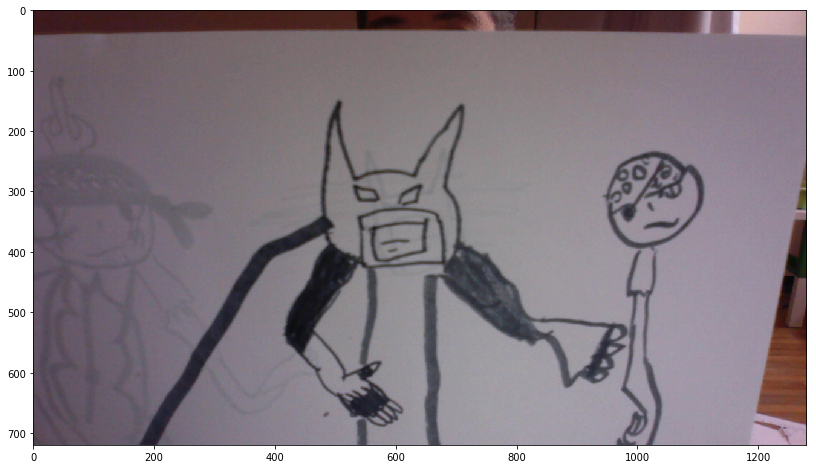

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,8))
ax.imshow(frame_np/255.)

In [12]:
def grab(cam):
    frame = np.asarray(cam.snap_picture())
    dtype = [('f0', np.uint8), ('f1', np.uint8), ('f2', np.uint8), ('f3', np.uint8)]
    frame_np = frame.view(dtype=dtype).view(dtype=np.uint8) # convert to UINT8
    frame_np = frame_np.reshape((cam.shape[0], cam.shape[1], 4)) # de-raveling
    frame_np = frame_np[:, :, :3] # removing alpha
    frame_np = frame_np[:, :, ::-1] # BGR > RGB
    return frame_np


print('frame as size', grab(cam).shape)

frame as size (720, 1280, 3)


In [13]:
%timeit grab(cam)

54.1 ms ± 5.12 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [14]:
import time
t0 = time.time()
N = 32
for i in range(N):
    _ = grab(cam)
t1 = time.time()
print('Executed = {:d} grabs'.format(N),
                  'in {:.1f} seconds'.format(t1-t0),
                  ' ({:.1f} fps)'.format(N/(t1-t0)))    

Executed = 32 grabs in 1.6 seconds  (19.6 fps)
